# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt  

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:


count = 0
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print(f"Beginning Data Retrieval")
print(f"------------------------------")
for city in cities:
        url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
#         print(url)
        weather_response = requests.get(url)
        weather_json = weather_response.json()
#         print(weather_json)
        try: 
            Cloudiness.append(weather_json['clouds']["all"])
            Country.append(weather_json['sys']["country"])
            Date.append(weather_json["dt"])
            Humidity.append(weather_json["main"]['humidity'])
            Lat.append(weather_json["coord"]['lat'])
            Lng.append(weather_json["coord"]['lon'])
            Max_Temp.append(weather_json["main"]['temp_max'])
            Wind_Speed.append(weather_json["wind"]['speed'])
            print( "Requesting " , count,"......" ,city)
            count = count + 1
            
        except KeyError:
        
            Cloudiness.append("")
            Country.append("")
            Date.append("")
            Humidity.append("")
            Lat.append("")
            Lng.append("")
            Max_Temp.append("")
            Wind_Speed.append("")
            print("Requesting " , count,"......" ,city, ".....Error, try again...")
            count = count + 1
# print(Cloudiness)
#             pass

Beginning Data Retrieval
------------------------------
Requesting  0 ...... vaitupu .....Error, try again...
Requesting  1 ...... bograd
Requesting  2 ...... butaritari
Requesting  3 ...... pisco
Requesting  4 ...... fort nelson
Requesting  5 ...... avarua
Requesting  6 ...... bredasdorp
Requesting  7 ...... yumen
Requesting  8 ...... gaoual
Requesting  9 ...... temir
Requesting  10 ...... milton
Requesting  11 ...... cayenne
Requesting  12 ...... trat
Requesting  13 ...... thompson
Requesting  14 ...... tuktoyaktuk
Requesting  15 ...... lodwar
Requesting  16 ...... bimbo
Requesting  17 ...... port-gentil
Requesting  18 ...... tsihombe .....Error, try again...
Requesting  19 ...... mataura
Requesting  20 ...... waingapu
Requesting  21 ...... atuona
Requesting  22 ...... christchurch
Requesting  23 ...... san patricio
Requesting  24 ...... yellowknife
Requesting  25 ...... san quintin
Requesting  26 ...... shakhrinau .....Error, try again...
Requesting  27 ...... saskylakh
Requesting  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
cities_df = pd.DataFrame({
                            " Cities" : cities, 
                            "Cloudiness" : Cloudiness,
                            "Country" : Country, 
                            "Date" : Date,
                            "Humidity" : Humidity, 
                            "Lat" : Lat,
                            "Lng" : Lng,
                            "Max_Temp" : Max_Temp,
                            "Wind_Speed" : Wind_Speed
                        })
cities_df


,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,vaitupu,,,,,,,,
1,bograd,40,RU,1594945698,93,54.23,90.83,60.8,6.71
2,butaritari,55,KI,1594945465,68,3.07,172.79,83.46,9.31
3,pisco,90,PE,1594945513,82,-13.7,-76.22,60.8,11.41
4,fort nelson,90,CA,1594945699,93,58.81,-122.7,59,3.36
...,...,...,...,...,...,...,...,...,...
640,cedar city,1,US,1594945802,14,37.68,-113.06,87.8,11.41
641,aanekoski,0,FI,1594945838,100,62.69,25.82,52,3.36
642,murwara,19,IN,1594945560,76,23.85,80.4,80.44,4.27
643,mitsamiouli,0,KM,1594945839,73,-11.38,43.28,75.09,25.05


In [13]:
cities_df.count()

 Cities       645
Cloudiness    645
Country       645
Date          645
Humidity      645
Lat           645
Lng           645
Max_Temp      645
Wind_Speed    645
dtype: int64

In [14]:
cities_df.to_csv("cities.csv", encoding="utf-8", index=False)

In [22]:
cities_df['Date'] = pd.to_datetime(cities_df.Date)

In [16]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0    Cities     645 non-null    object        
 1   Cloudiness  645 non-null    object        
 2   Country     645 non-null    object        
 3   Date        594 non-null    datetime64[ns]
 4   Humidity    645 non-null    object        
 5   Lat         645 non-null    object        
 6   Lng         645 non-null    object        
 7   Max_Temp    645 non-null    object        
 8   Wind_Speed  645 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 45.5+ KB


In [17]:
cities_df

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,vaitupu,,,NaT,,,,,
1,bograd,40,RU,1970-01-01 00:00:01.594945698,93,54.23,90.83,60.8,6.71
2,butaritari,55,KI,1970-01-01 00:00:01.594945465,68,3.07,172.79,83.46,9.31
3,pisco,90,PE,1970-01-01 00:00:01.594945513,82,-13.7,-76.22,60.8,11.41
4,fort nelson,90,CA,1970-01-01 00:00:01.594945699,93,58.81,-122.7,59,3.36
...,...,...,...,...,...,...,...,...,...
640,cedar city,1,US,1970-01-01 00:00:01.594945802,14,37.68,-113.06,87.8,11.41
641,aanekoski,0,FI,1970-01-01 00:00:01.594945838,100,62.69,25.82,52,3.36
642,murwara,19,IN,1970-01-01 00:00:01.594945560,76,23.85,80.4,80.44,4.27
643,mitsamiouli,0,KM,1970-01-01 00:00:01.594945839,73,-11.38,43.28,75.09,25.05


In [38]:

nan_value = float("NaN")
cities_df.replace("", nan_value, inplace = True)
cities_df.dropna(subset = ["Cloudiness"], inplace = True)
cities_df


,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
1,bograd,40.0,RU,1970-01-01 00:00:01.594945698,93.0,54.23,90.83,60.80,6.71
2,butaritari,55.0,KI,1970-01-01 00:00:01.594945465,68.0,3.07,172.79,83.46,9.31
3,pisco,90.0,PE,1970-01-01 00:00:01.594945513,82.0,-13.70,-76.22,60.80,11.41
4,fort nelson,90.0,CA,1970-01-01 00:00:01.594945699,93.0,58.81,-122.70,59.00,3.36
5,avarua,2.0,CK,1970-01-01 00:00:01.594945699,69.0,-21.21,-159.78,73.40,10.29
...,...,...,...,...,...,...,...,...,...
640,cedar city,1.0,US,1970-01-01 00:00:01.594945802,14.0,37.68,-113.06,87.80,11.41
641,aanekoski,0.0,FI,1970-01-01 00:00:01.594945838,100.0,62.69,25.82,52.00,3.36
642,murwara,19.0,IN,1970-01-01 00:00:01.594945560,76.0,23.85,80.40,80.44,4.27
643,mitsamiouli,0.0,KM,1970-01-01 00:00:01.594945839,73.0,-11.38,43.28,75.09,25.05


In [40]:
clean_city_data_df = cities_df
clean_city_data_df

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
1,bograd,40.0,RU,1970-01-01 00:00:01.594945698,93.0,54.23,90.83,60.80,6.71
2,butaritari,55.0,KI,1970-01-01 00:00:01.594945465,68.0,3.07,172.79,83.46,9.31
3,pisco,90.0,PE,1970-01-01 00:00:01.594945513,82.0,-13.70,-76.22,60.80,11.41
4,fort nelson,90.0,CA,1970-01-01 00:00:01.594945699,93.0,58.81,-122.70,59.00,3.36
5,avarua,2.0,CK,1970-01-01 00:00:01.594945699,69.0,-21.21,-159.78,73.40,10.29
...,...,...,...,...,...,...,...,...,...
640,cedar city,1.0,US,1970-01-01 00:00:01.594945802,14.0,37.68,-113.06,87.80,11.41
641,aanekoski,0.0,FI,1970-01-01 00:00:01.594945838,100.0,62.69,25.82,52.00,3.36
642,murwara,19.0,IN,1970-01-01 00:00:01.594945560,76.0,23.85,80.40,80.44,4.27
643,mitsamiouli,0.0,KM,1970-01-01 00:00:01.594945839,73.0,-11.38,43.28,75.09,25.05


In [41]:
clean_city_data_df.to_csv("clean_cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [90]:
clean_city_data_hum_df = clean_city_data_df[clean_city_data_df["Humidity"]>100]
clean_city_data_hum_df

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

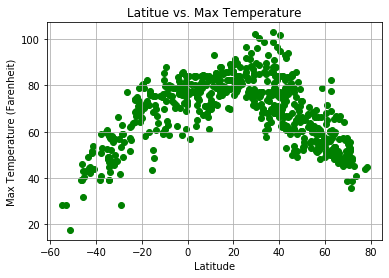

In [42]:
lat = clean_city_data_df ["Lat"]
temp = clean_city_data_df ["Max_Temp"]

plt.scatter(lat, temp,color="green")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Latitue vs. Max Temperature")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

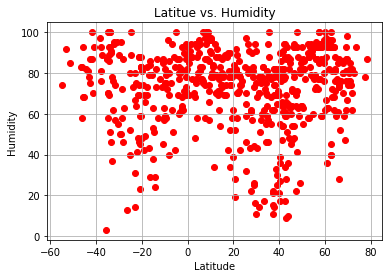

In [47]:
lat = clean_city_data_df ["Lat"]
hum = clean_city_data_df ["Humidity"]

plt.scatter(lat, hum,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitue vs. Humidity")
plt.grid()
plt.show()


## Latitude vs. Cloudiness Plot

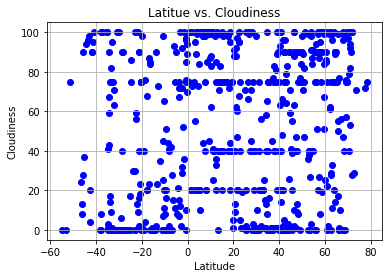

In [64]:
lat = clean_city_data_df ["Lat"]
cloud = clean_city_data_df ["Cloudiness"]

plt.scatter(lat, cloud,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitue vs. Cloudiness")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

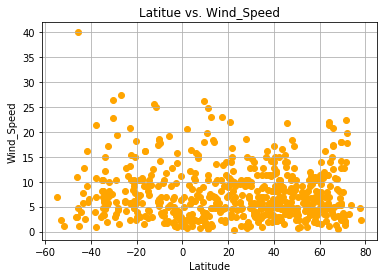

In [50]:
lat = clean_city_data_df ["Lat"]
wind = clean_city_data_df ["Wind_Speed"]

plt.scatter(lat, wind,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Latitue vs. Wind_Speed")
plt.grid()
plt.show()

## Linear Regression

In [53]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]>0]
# northern_hemisphere_df
southern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]<0]
# southern_hemisphere_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

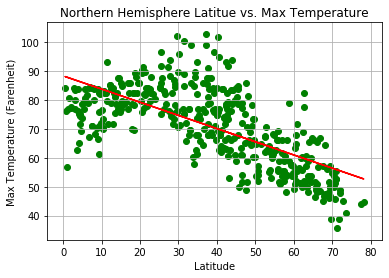

In [79]:
n_lat = northern_hemisphere_df ["Lat"]
n_temp = northern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.scatter(n_lat, n_temp,color="green")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Northern Hemisphere Latitue vs. Max Temperature")
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

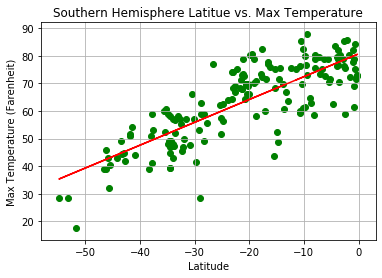

In [80]:
s_lat = southern_hemisphere_df ["Lat"]
s_temp = southern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.scatter(s_lat, s_temp,color="green")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Southern Hemisphere Latitue vs. Max Temperature")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

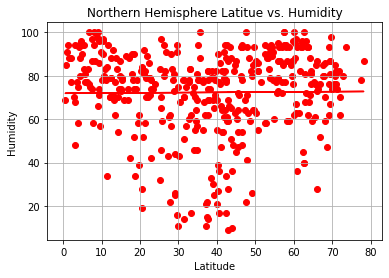

In [82]:
n_lat = northern_hemisphere_df ["Lat"]
n_hum = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")

plt.scatter(n_lat, n_hum,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitue vs. Humidity")
plt.grid()
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

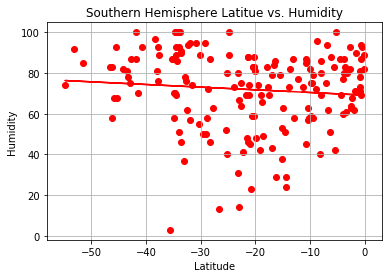

In [83]:
s_lat = southern_hemisphere_df ["Lat"]
s_hum = southern_hemisphere_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum )
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")

plt.scatter(s_lat,s_hum,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitue vs. Humidity")
plt.grid()
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

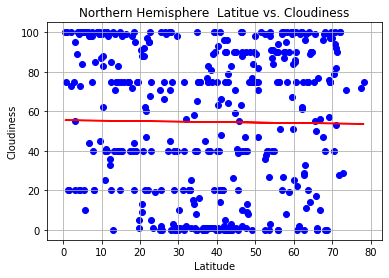

In [84]:
n_lat = northern_hemisphere_df ["Lat"]
n_cloud = northern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")


plt.scatter(n_lat, n_cloud,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere  Latitue vs. Cloudiness")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

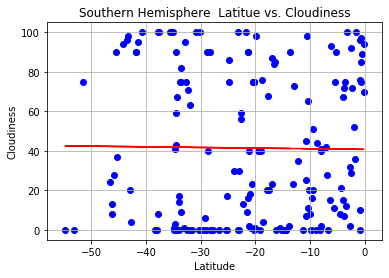

In [85]:
s_lat = southern_hemisphere_df ["Lat"]
s_cloud = southern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")

plt.scatter(s_lat, s_cloud,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere  Latitue vs. Cloudiness")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

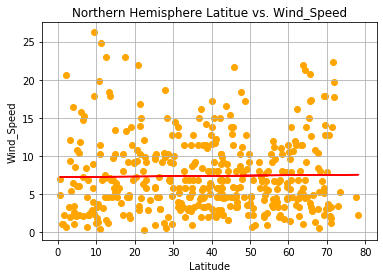

In [86]:
n_lat = northern_hemisphere_df ["Lat"]
n_wind = northern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")

plt.scatter(n_lat, n_wind,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Northern Hemisphere Latitue vs. Wind_Speed")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

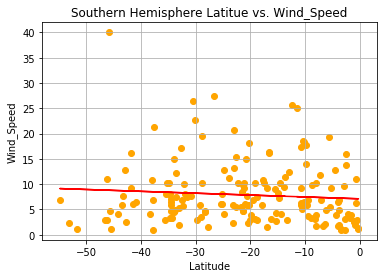

In [87]:
s_lat = southern_hemisphere_df ["Lat"]
s_wind = southern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat,s_wind)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")

plt.scatter(s_lat, s_wind,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Southern Hemisphere Latitue vs. Wind_Speed")
plt.grid()
plt.show()